In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from time import time
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics,preprocessing
from sklearn.neural_network import MLPClassifier

In [2]:
directory = os.fsencode('../data_NN/')

file_number = 0
X = np.zeros((1,513))
y = []
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.find('walking_diagonal_1_Dataset_1') == -1 and (filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1\
                                                               or filename.find('diagonal_1') != -1 or filename.find('diagonal_2') != -1\
                                                               or filename.find('azimuth') != -1) and filename.find('azimuth_2_Dataset_2') == -1:
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values, axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        
        file_number += 1
X = X[1:,:]
y = y - min(y) #reposition y from 0 to ....
print(X.shape)
print(y.shape)
X_train = X
y_train = y

../data_NN/biking_azimuth_1_Dataset_1_statistics.txt
(272, 513)
../data_NN/biking_azimuth_1_Dataset_2_statistics.txt
(120, 513)
../data_NN/biking_azimuth_2_Dataset_1_statistics.txt
(237, 513)
../data_NN/biking_boresight_1_Dataset_1_statistics.txt
(119, 513)
../data_NN/biking_boresight_1_Dataset_2_statistics.txt
(51, 513)
../data_NN/biking_boresight_2_Dataset_1_statistics.txt
(113, 513)
../data_NN/biking_boresight_2_Dataset_2_statistics.txt
(46, 513)
../data_NN/biking_diagonal_1_Dataset_1_statistics.txt
(123, 513)
../data_NN/biking_diagonal_1_Dataset_2_statistics.txt
(97, 513)
../data_NN/biking_diagonal_2_Dataset_1_statistics.txt
(120, 513)
../data_NN/biking_diagonal_2_Dataset_2_statistics.txt
(77, 513)
../data_NN/driving_azimuth_1_Dataset_1_statistics.txt
(284, 513)
../data_NN/driving_azimuth_1_Dataset_2_statistics.txt
(212, 513)
../data_NN/driving_azimuth_2_Dataset_1_statistics.txt
(241, 513)
../data_NN/driving_azimuth_3_Dataset_2_statistics.txt
(105, 513)
../data_NN/driving_boresight

In [3]:
print(X_train.shape)
print(y_train.shape)

(4548, 513)
(4548,)


In [4]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,513))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and (filename.find('boresight_3') != -1 or filename.find('diagonal_3') != -1 or filename.find('azimuth_2_Dataset_2') != -1):
        file_number += 1
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values, axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")

../data_NN/biking_azimuth_2_Dataset_2_statistics.txt
(114, 513)
../data_NN/biking_boresight_3_Dataset_1_statistics.txt
(89, 513)
../data_NN/biking_boresight_3_Dataset_2_statistics.txt
(43, 513)
../data_NN/biking_diagonal_3_Dataset_1_statistics.txt
(110, 513)
../data_NN/biking_diagonal_3_Dataset_2_statistics.txt
(75, 513)
../data_NN/driving_azimuth_2_Dataset_2_statistics.txt
(86, 513)
../data_NN/driving_boresight_3_Dataset_1_statistics.txt
(62, 513)
../data_NN/driving_boresight_3_Dataset_2_statistics.txt
(50, 513)
../data_NN/driving_diagonal_3_Dataset_1_statistics.txt
(132, 513)
../data_NN/driving_diagonal_3_Dataset_2_statistics.txt
(93, 513)
../data_NN/walking_azimuth_2_Dataset_2_statistics.txt
(106, 513)
../data_NN/walking_boresight_3_Dataset_1_statistics.txt
(146, 513)
../data_NN/walking_boresight_3_Dataset_2_statistics.txt
(101, 513)
../data_NN/walking_diagonal_3_Dataset_1_statistics.txt
(137, 513)
../data_NN/walking_diagonal_3_Dataset_2_statistics.txt
(121, 513)
(1465, 513)
(1465,)

In [5]:
print(X_test.shape)
print(y_test.shape)

(1465, 513)
(1465,)


In [6]:
### Normalize dataset
X_dataset = np.append(X_train,X_test,axis=0)
scaler = preprocessing.StandardScaler().fit(X_dataset)
mean = scaler.mean_
scale = scaler.scale_
X_scaled = scaler.transform(X_dataset)
X_train = X_scaled[:len(y_train),:]
X_test = X_scaled[len(y_train):,:]
filename = 'boresight_diagonal_azimuth_norm_factors.csv'

data_to_file = pd.DataFrame([mean,scale])
print(data_to_file)
#data_to_file.to_csv(filename, sep='\t',index=False, header=True)
### Make cross validation set
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, train_size=0.80, test_size=0.20, random_state=100)
print(X_train.shape)
print(X_dataset.shape)

        0         1         2         3         4         5         6    \
0  0.000164  0.000171  0.000176  0.000168  0.000161  0.000170  0.000177   
1  0.000118  0.000137  0.000141  0.000120  0.000112  0.000134  0.000143   

        7         8         9    ...       503       504       505       506  \
0  0.000169  0.000161  0.000169  ...  0.000168  0.000160  0.000168  0.000174   
1  0.000122  0.000111  0.000130  ...  0.000120  0.000109  0.000127  0.000134   

        507       508       509       510       511        512  
0  0.000166  0.000159  0.000169  0.000176  0.000170  14.263346  
1  0.000115  0.000109  0.000132  0.000143  0.000125   5.402068  

[2 rows x 513 columns]
(4548, 513)
(6013, 513)


In [13]:
from time import time
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(500,250,50), (200,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05, 0.1, 1],
    'learning_rate': ['constant','adaptive'],
}
start_algo_tic = time()
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
start_algo_toc = time()
print(f"Done in {start_algo_toc - start_algo_tic:.3f}s")

Done in 1749.115s


/home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (500, 250, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.454 (+/-0.093) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (500, 250, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.506 (+/-0.091) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (500, 250, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.449 (+/-0.104) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (500, 250, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.505 (+/-0.098) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (500, 250, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.448 (+/-0.092) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.467 (+/-0.076) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'solver': 'ad

<ipython-input-16-76cc790b8ed4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+class_names,fontsize=30)
<ipython-input-16-76cc790b8ed4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=30)


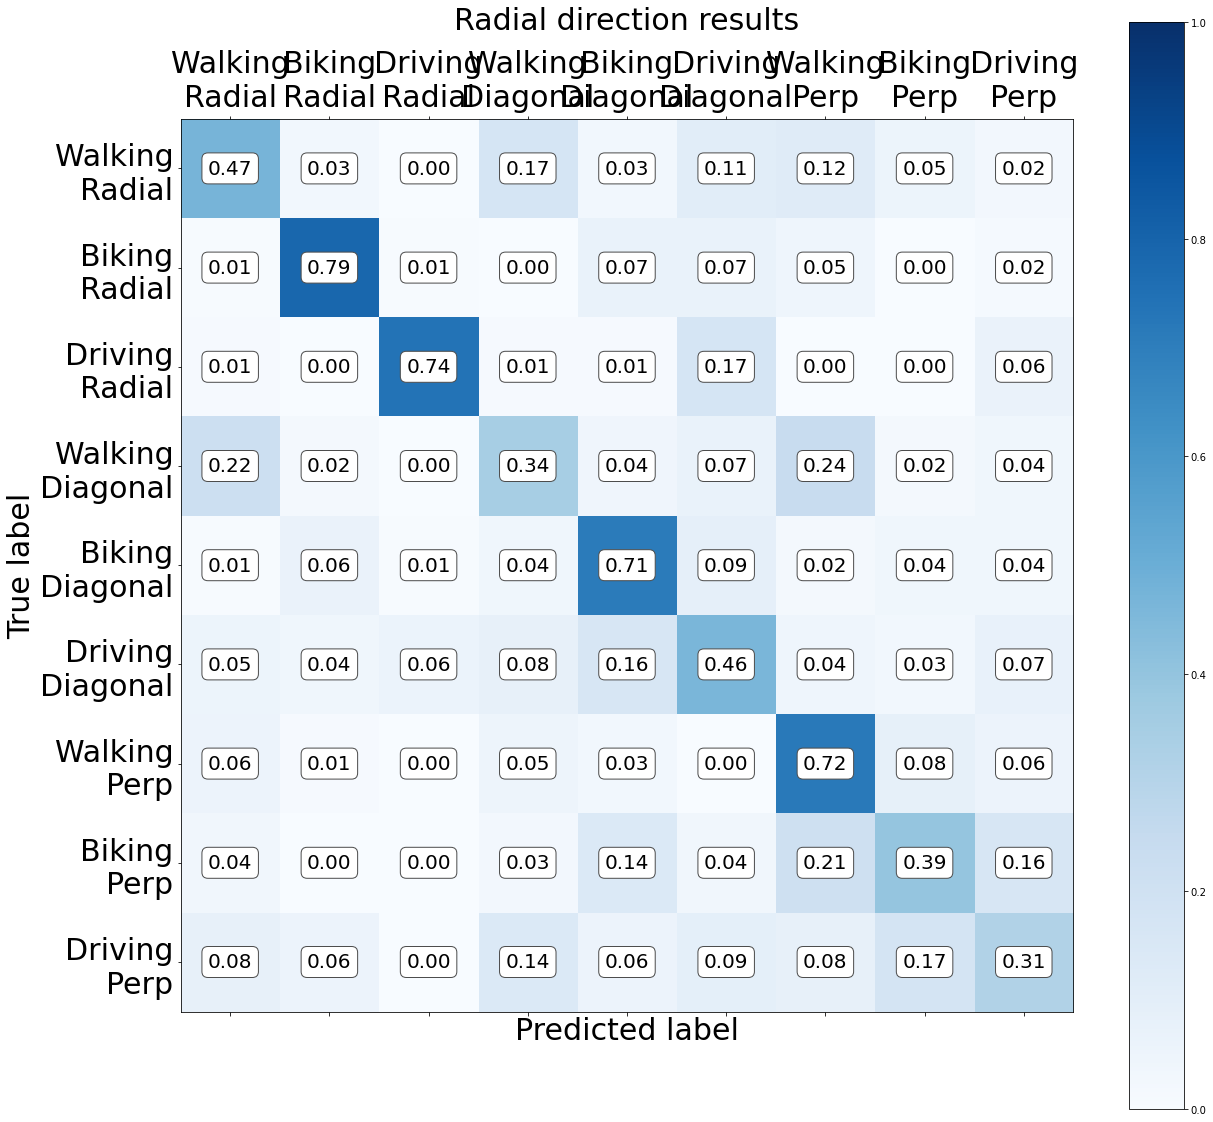

In [16]:
import matplotlib as mpl
ConfusionMatrix = metrics.confusion_matrix(y_true,y_pred, normalize='true')
fig,ax = plt.subplots(1,1,figsize=(20,20))
cax = ax.matshow(ConfusionMatrix, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)
class_names = ['Walking\nRadial','Biking\nRadial','Driving\nRadial',\
               'Walking\nDiagonal','Biking\nDiagonal','Driving\nDiagonal',\
              'Walking\nPerp','Biking\nPerp','Driving\nPerp']
_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Radial direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+class_names,fontsize=30)
_=ax.set_yticklabels(['']+class_names,fontsize=30)
for (i, j), z in np.ndenumerate(ConfusionMatrix):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    

<ipython-input-20-178054fcfbbd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-20-178054fcfbbd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


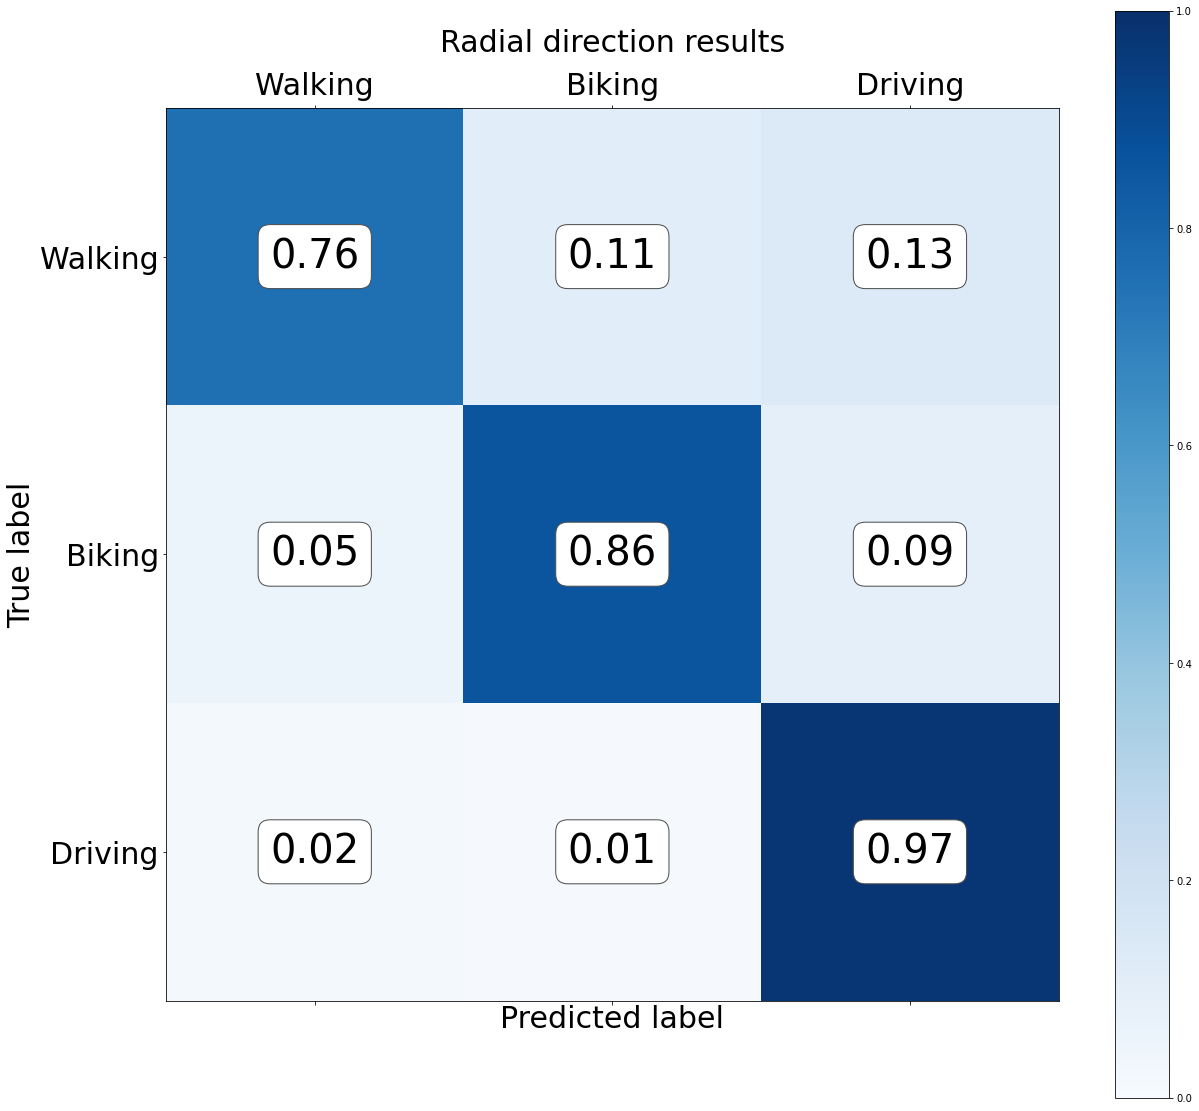

In [20]:
ConfusionMatrix = metrics.confusion_matrix(y_true,y_pred, normalize='true')
confusion_results = [[0, 0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],0)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][column%3] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(20,20))
radial_results = confusion_results[0:3]
cax = ax.matshow(radial_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Radial direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(radial_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    

<ipython-input-21-9bd81de396b6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-21-9bd81de396b6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


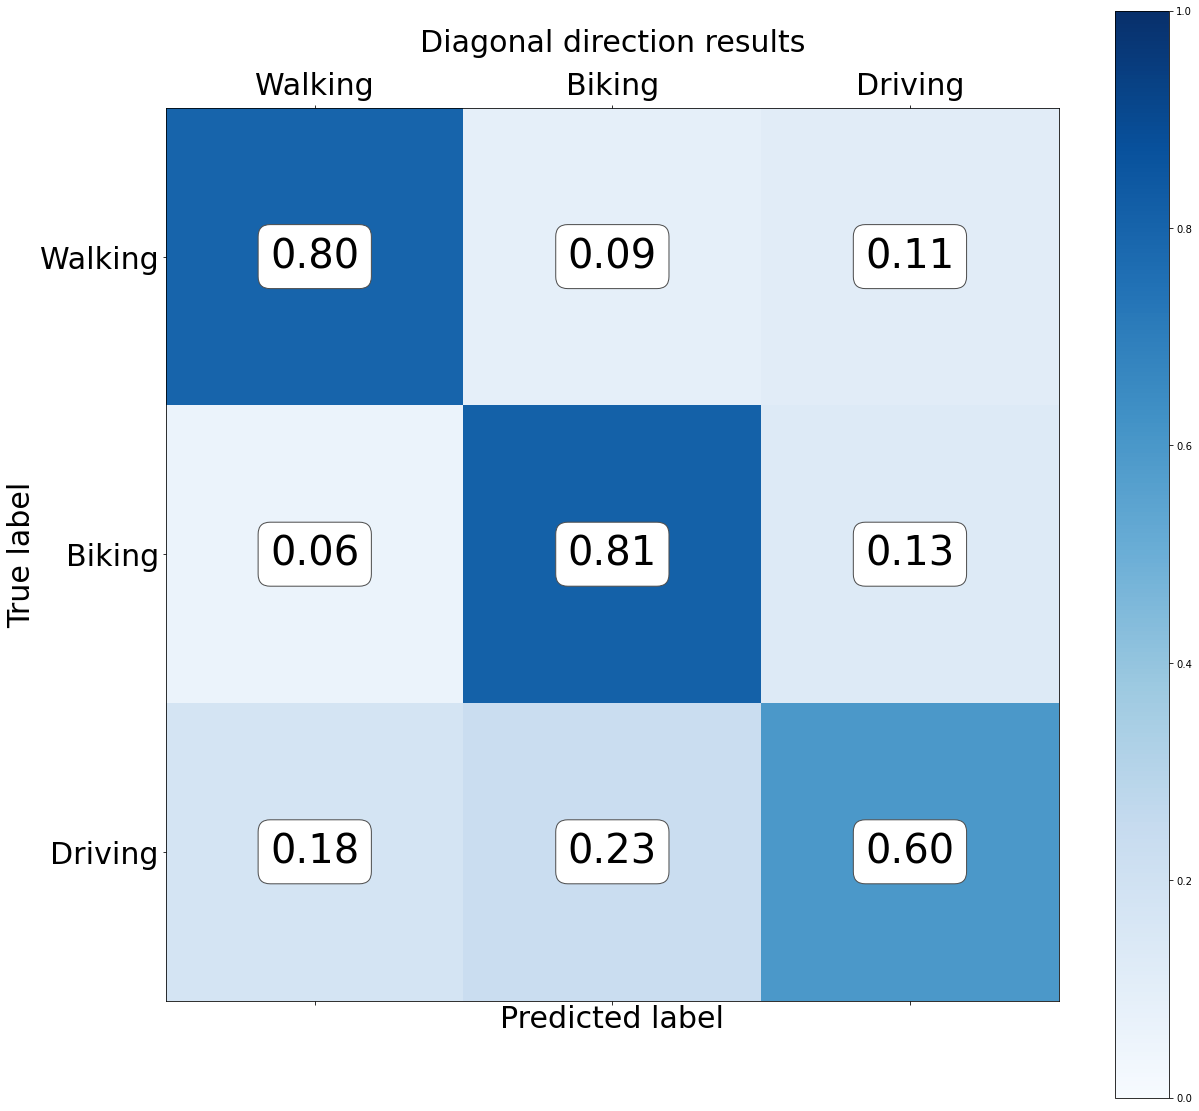

In [21]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
diagonal_results = confusion_results[3:6]
cax = ax.matshow(diagonal_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Diagonal direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(diagonal_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
#plt.savefig('Figures/Diagonal_Performance_Matrix_ALL',format='png')

<ipython-input-22-b7c52df565e6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-22-b7c52df565e6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


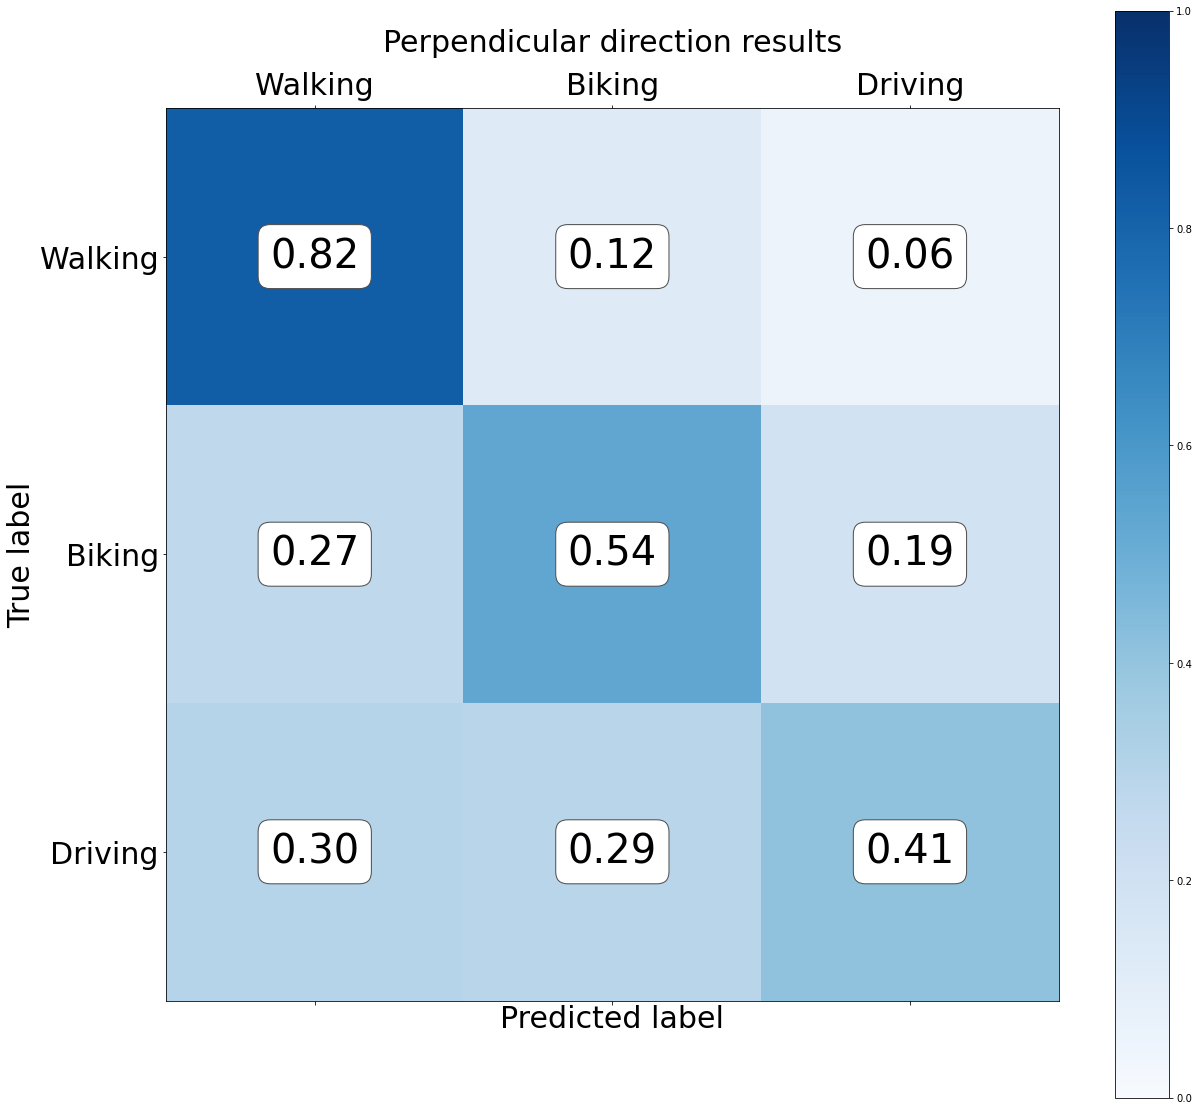

In [22]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
azimuth_results = confusion_results[6:9]
cax = ax.matshow(azimuth_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Perpendicular direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(azimuth_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
#plt.savefig('Figures/Perpendicular_Performance_Matrix_ALL',format='png')